In [1]:
import os

In [143]:
import pandas as pd
import seaborn as sn
import matplotlib.pylab as plt
import matplotlib as mpl

In [2]:
import snowflake.connector

In [3]:
ACCOUNT = os.getenv("SNOWSQL_ACCOUNT")
USER = os.getenv("SNOWSQL_USER")
PASSWORD = os.getenv('SNOWSQL_PWD')
WAREHOUSE = os.getenv('SNOWSQL_WAREHOUSE')

In [4]:
print(USER)

ABETEACH


In [5]:
 con = snowflake.connector.connect(
    account=ACCOUNT,
    user=USER,
    password=PASSWORD,
    warehouse=WAREHOUSE,
    session_parameters={
        'QUERY_TAG': 'python_notebook',
    }
)

In [6]:
con

In [7]:
con.cursor().execute("USE DATABASE twitter")
con.cursor().execute("USE SCHEMA processed")

In [9]:
cur = con.cursor()
try:
    cur.execute("SELECT count, year, month, day FROM twitter.processed.volume")
    for (count, year, month, day) in cur:
        print('{0}, {1}, {2}, {3}'.format(count, year, month, day))
finally:
    cur.close()

65563, 2021, 4, 15
63565, 2021, 4, 16
34217, 2021, 4, 17
35746, 2021, 4, 18
50528, 2021, 4, 19
87370, 2021, 4, 20
67694, 2021, 4, 21
51817, 2021, 4, 22
46578, 2021, 4, 23
34811, 2021, 4, 24
26562, 2021, 4, 25
45329, 2021, 4, 26
48594, 2021, 4, 27
44133, 2021, 4, 28
54189, 2021, 4, 29
43674, 2021, 4, 30
32221, 2021, 5, 1
33486, 2021, 5, 2
47764, 2021, 5, 3
49249, 2021, 5, 4
50212, 2021, 5, 5
55440, 2021, 5, 6
42519, 2021, 5, 7
92822, 2021, 5, 8
69845, 2021, 5, 9
53263, 2021, 5, 10
51510, 2021, 5, 11
59271, 2021, 5, 12
59185, 2021, 5, 13
45025, 2021, 5, 14
45667, 2021, 5, 15
40675, 2021, 5, 16
48203, 2021, 5, 17
50390, 2021, 5, 18
57920, 2021, 5, 19
41419, 2021, 5, 20
42525, 2021, 5, 21
29910, 2021, 5, 22
39634, 2021, 5, 23
54574, 2021, 5, 24
65098, 2021, 5, 25
53551, 2021, 5, 26
48080, 2021, 5, 27
51956, 2021, 5, 28
33314, 2021, 5, 29
31500, 2021, 5, 30
49597, 2021, 5, 31
62595, 2021, 6, 1
71287, 2021, 6, 2
46347, 2021, 6, 3
57358, 2021, 6, 4
42442, 2021, 6, 5
42079, 2021, 6, 6
48118, 2

In [10]:
#import pandas

In [11]:
cur = con.cursor()
cur.execute("SELECT count, year, month, day FROM twitter.processed.volume")

In [12]:
df = cur.fetch_pandas_all()

In [14]:
import seaborn as sn

In [18]:
import datetime

In [30]:
dates = [datetime.datetime(year=row['YEAR'], month=row['MONTH'], day=row['DAY'])
        for _idx, row in df.iterrows()]
#dates = [row for _idx, row in df.iterrows()]

In [34]:
dates[0]

datetime.datetime(2021, 4, 15, 0, 0)

In [35]:
df['DATE'] = dates

<AxesSubplot:xlabel='DATE', ylabel='COUNT'>

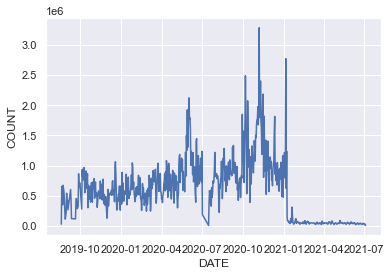

In [38]:
sn.lineplot(data=df, x="DATE", y="COUNT")

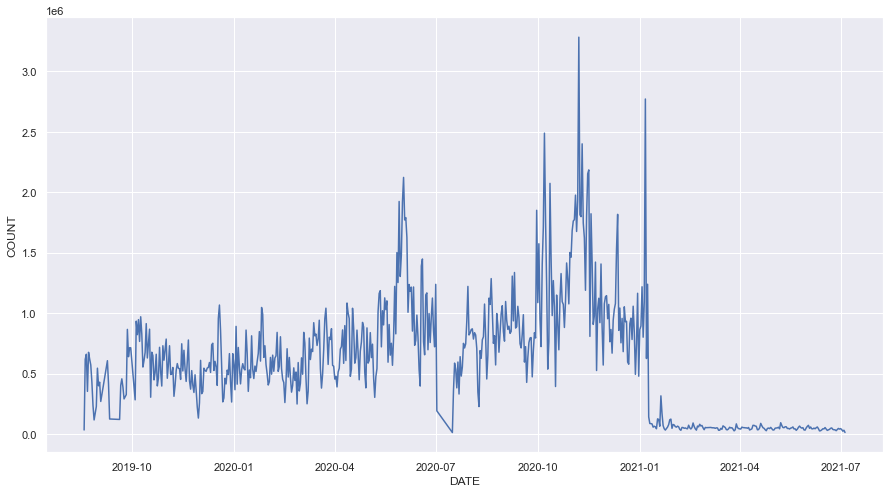

In [103]:
sn.set(rc = {'figure.figsize':(15,8)})
#sn.set()
ax = sn.lineplot(data=df, x="DATE", y="COUNT")

In [104]:
#start, end = dates[0], dates[-1]
start, end = min(dates), max(dates)

In [130]:
#pd.date_range(dates[0], dates[-1], 
#              freq='M')#.strftime("%Y-%b").tolist()
#list(pd.date_range("2021-04-15", "2020-02-16"))
#month_list = [i.strftime("%b-%y") for i in pd.date_range(start=start, end=end, freq='MS')]
#month_list = pd.date_range(start=start, end=end, freq='MS')
month_list = [i.strftime("%Y-%m") for i in pd.date_range(start=start, end=end, freq='MS')]

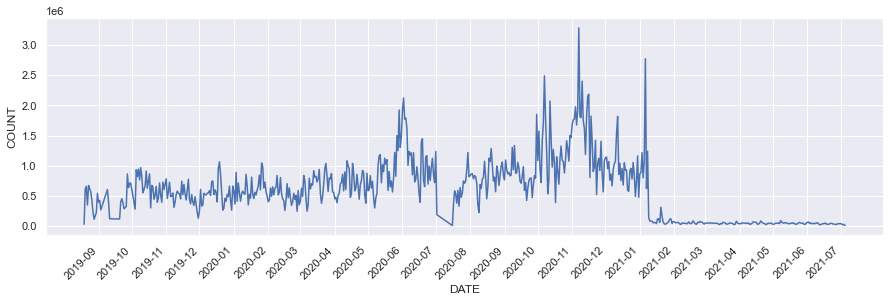

In [137]:
# PLOTTING
fig, ax = plt.subplots(figsize = (15,4))
fig = sn.lineplot(data=df, x="DATE", y="COUNT")
ax.set_xticks(month_list)
ax.set_xticklabels(labels=month_list, rotation=45, ha='right');

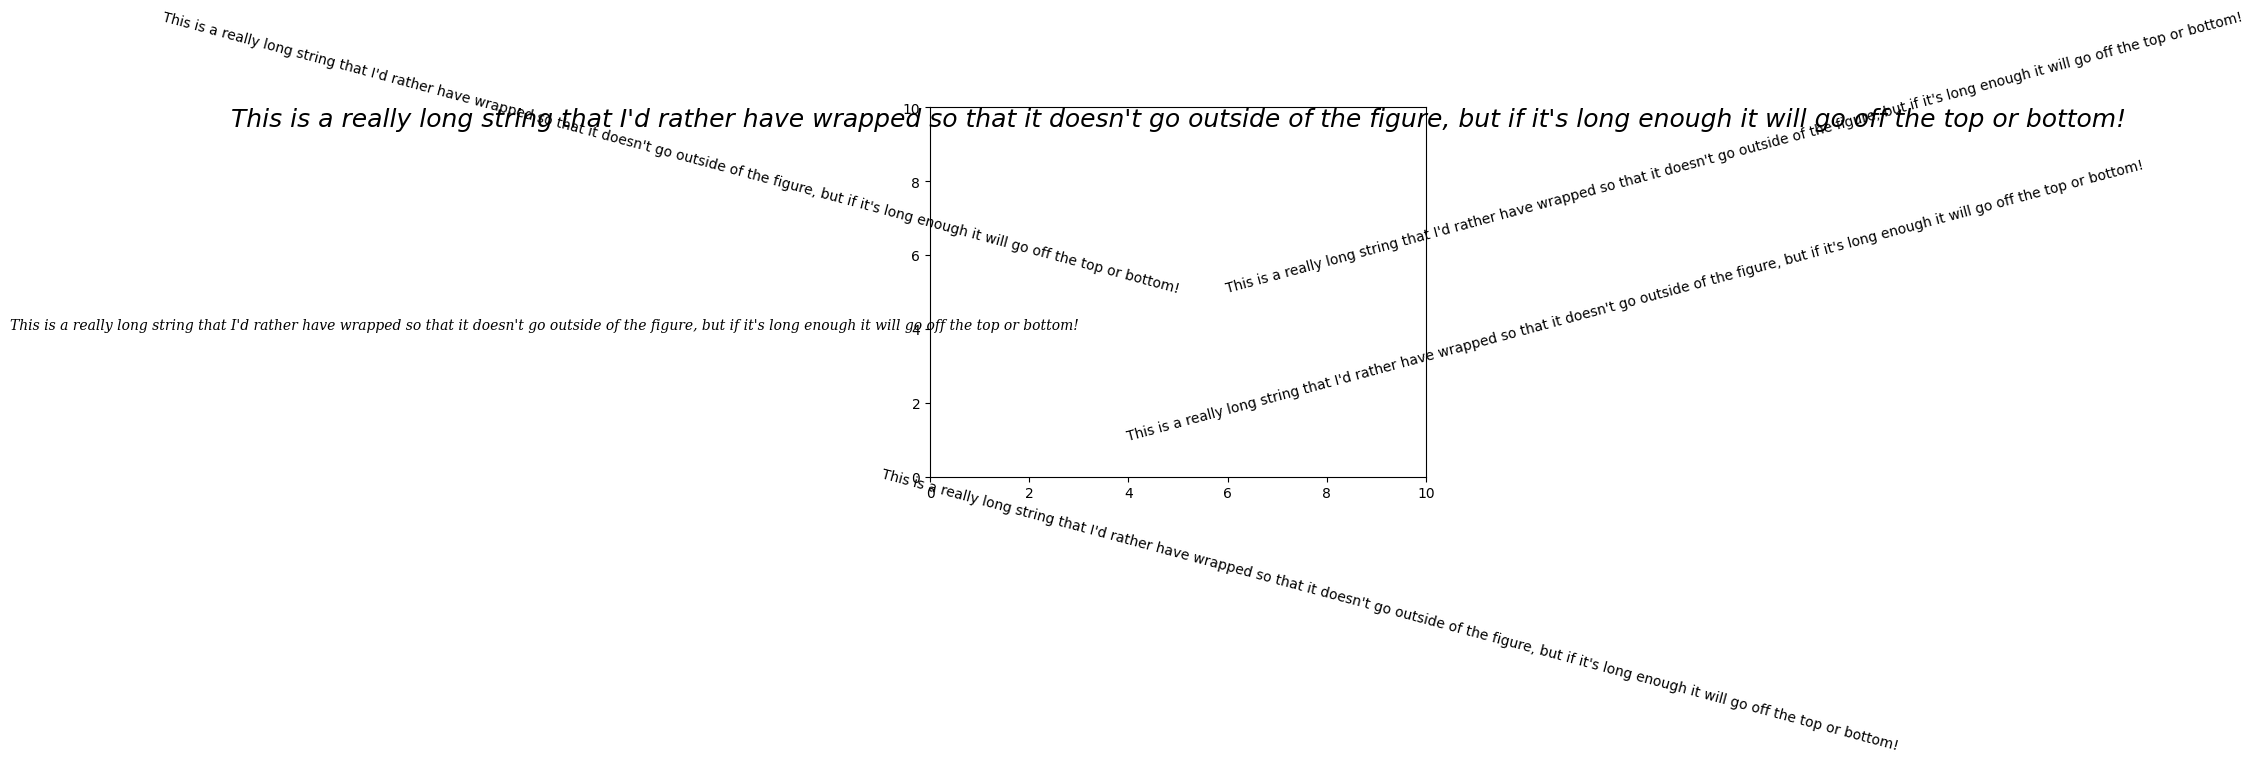

In [144]:
# cf https://matplotlib.org/2.0.2/examples/text_labels_and_annotations/autowrap_demo.html
#plt.figure(figsize=(6.4,4.8))
plt.style.use('default')
fig = plt.figure()
plt.axis([0, 10, 0, 10])
t = "This is a really long string that I'd rather have wrapped so that it"\
    " doesn't go outside of the figure, but if it's long enough it will go"\
    " off the top or bottom!"
plt.text(4, 1, t, ha='left', rotation=15, wrap=True)
plt.text(6, 5, t, ha='left', rotation=15, wrap=True)
plt.text(5, 5, t, ha='right', rotation=-15, wrap=True)
plt.text(5, 10, t, fontsize=18, style='oblique', ha='center',
         va='top', wrap=True)
plt.text(3, 4, t, family='serif', style='italic', ha='right', wrap=True)
plt.text(-1, 0, t, ha='left', rotation=-15, wrap=True)

plt.show()

In [235]:
events = pd.read_csv("../key_dates.tsv", sep="\t", header=None, names=("date_txt", "event"), comment='#')

In [236]:
events

,date_txt,event
0,2019-12-18,First Trump impeachment
1,2020-05-25,George Floyd dies in police custody
2,2020-05-29,Chauvin charged; Curfews announced; MN Nationa...
3,2020-06-08,Seattle Capitol Hill Autonomous Zone started
4,2020-07-01,Seattle Capitol Hill Autonomous Zone cleared b...
5,2020-07-07,Demobilization of MN State National Guard
6,2020-08-23,Shooting of Jacob Blake in Kenosha
7,2020-08-26,Minneapolis false rumor riot
8,2020-10-02,Trump tests positive for COVID
9,2020-11-02,US 2020 presidential election


In [237]:
events['date'] = pd.to_datetime(events['date_txt'])

In [238]:
import numpy as np

In [239]:
np.zeros(len(events))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

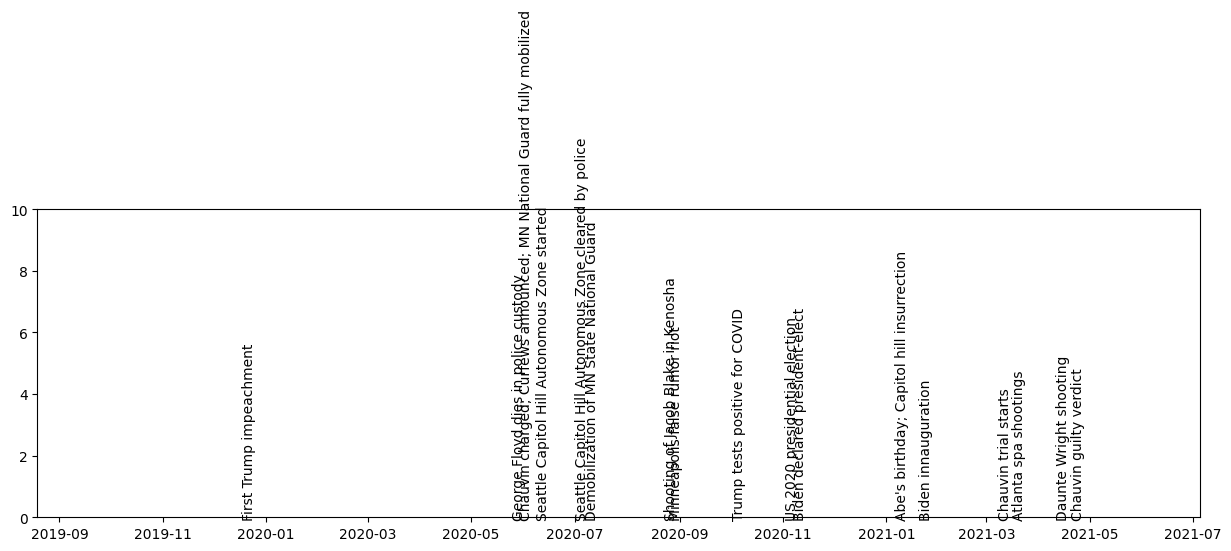

In [240]:
fig, ax = plt.subplots(figsize = (15,4))
#plt.axis([min(events['date']), max(events['date']), 0, 10])
#plt.text(events['date'][0],0, events['event'][0], rotation= 45)
plt.axis([min(dates), max(dates), 0, 10])


for _idx, row in events.iterrows():
    #plt.text(row['date'], 0, row['event'], ha='left', rotation=45, wrap=True)
    plt.text(row['date'], 0, row['event'], rotation=90)
#    break
#fig.text(events['date'][0], 0, events['event'][0], rotation=45)
#plt.text(events['date'][0], 10, "hi", rotation=45)
#plt.show()

In [ ]:
# PLOTTING
fig, ax = plt.subplots(figsize = (15,4))
fig = sn.lineplot(data=df, x="DATE", y="COUNT")
ax.set_xticks(month_list)
ax.set_xticklabels(labels=month_list, rotation=45, ha='right');

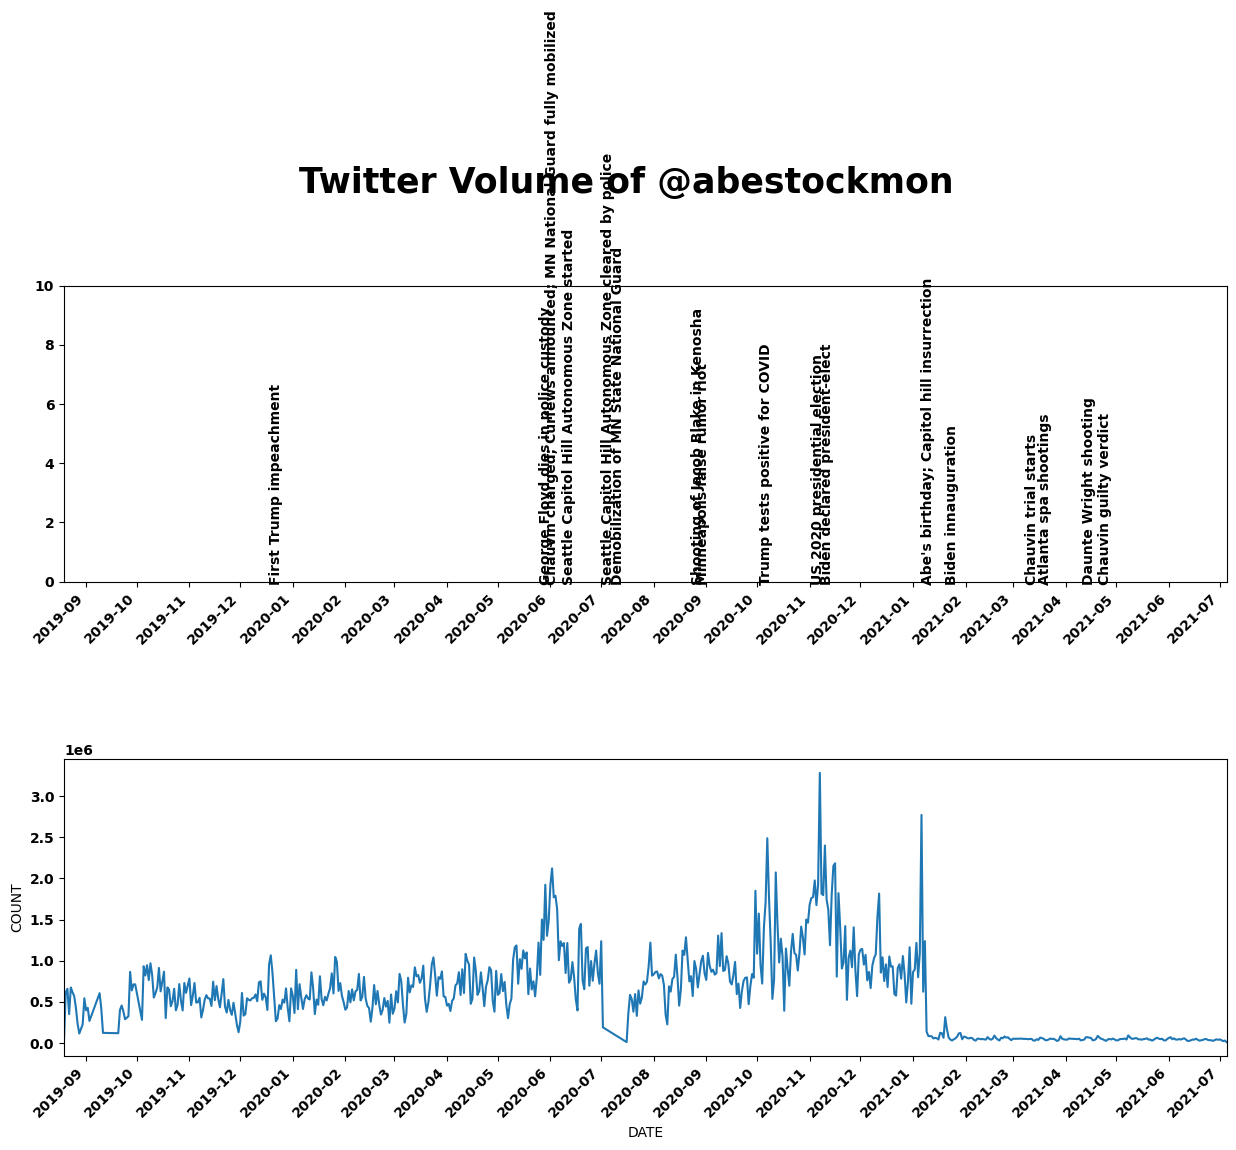

In [255]:
# roughly based on https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html
fig = plt.figure()

plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams["font.weight"] = "bold"

plt.subplots_adjust(hspace=0.60)


fontdicty={'fontsize': 20,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 20,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

fig.suptitle('Twitter Volume of @abestockmon', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.0))

#ax2 is defined first because the other plots are sharing its x-axis
ax1 = fig.add_subplot(212)
#ax2.scatter('temp', 'cnt', data=day.loc[day['season']==2], c="orange")
#ax2.set_title('Summer', fontdict=fontdict, color="orange")
#ax2.set_ylabel("Count of Total Rental Bikes", fontdict=fontdicty, position=(-0.3,-0.2))
sn.lineplot(data=df, x="DATE", y="COUNT")
ax1.set_xticks(month_list)
ax1.set_xticklabels(labels=month_list, rotation=45, ha='right');

ax2 = fig.add_subplot(211, sharex=ax1)
#fig, ax = 
#plt.subplots(figsize = (15,4))
#plt.axis([min(events['date']), max(events['date']), 0, 10])
#plt.text(events['date'][0],0, events['event'][0], rotation= 45)

plt.axis([min(dates), max(dates), 0, 10])
for _idx, row in events.iterrows():
    plt.text(row['date'], 0, row['event'], rotation=90)

ax2.set_xticklabels(labels=month_list, rotation=45, ha='right');
#ax1 = fig.add_subplot(411, sharex=ax2)
#ax1.scatter('temp', 'cnt', data=day.loc[day['season']==1], c="green")
#ax1.set_title('Spring', fontdict=fontdict, color="green")


#ax3 = fig.add_subplot(413, sharex=ax2)
#ax3.scatter('temp', 'cnt', data=day.loc[day['season']==3], c="brown")
#ax3.set_title('Fall or Autumn', fontdict=fontdict, color="brown")


#ax4 = fig.add_subplot(414, sharex=ax2)
#ax4.scatter('temp', 'cnt', data=day.loc[day['season']==4], c="blue")
#ax4.set_title('Winter', fontdict=fontdict, color="blue")
#ax4.set_xlabel("Normalized temperature", fontdict=fontdictx);
